In [1]:
import sys
!{sys.executable} -m pip install pycbc lalsuite --no-cache-dir

In [2]:
# Get the data for H1 from the LOSC site
!wget https://losc.ligo.org/s/events/GW170104/H-H1_LOSC_4_V1-1167559920-32.gwf
!wget https://losc.ligo.org/s/events/GW170104/L-L1_LOSC_4_V1-1167559920-32.gwf

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   265  100   265    0     0    497      0 --:--:-- --:--:-- --:--:--   497
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   265  100   265    0     0    936      0 --:--:-- --:--:-- --:--:--   939


### See the track of GW170104 in both the Hanford and Livingston data ###

<Figure size 432x288 with 0 Axes>

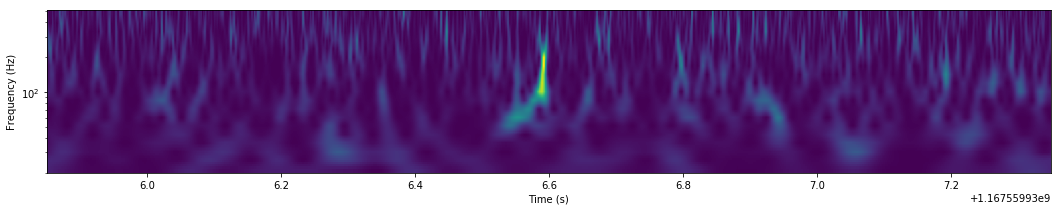

<Figure size 432x288 with 0 Axes>

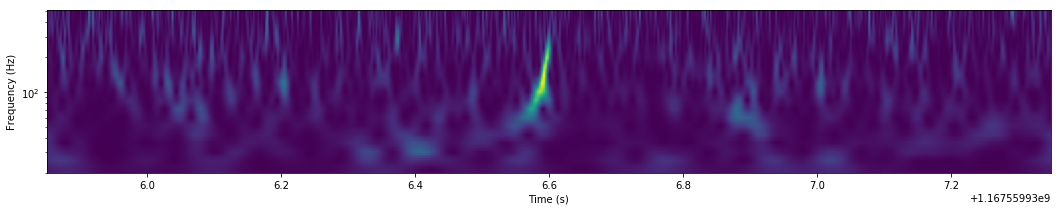

In [3]:
%matplotlib inline

from pycbc.catalog import Merger
import pylab

for ifo in ['H1', 'L1']:
    pylab.figure()
    ts = Merger("GW170104").strain(ifo)

    ts = ts.whiten(4, 4)
    zoom = ts.time_slice(1167559936.6 - .75, 1167559936.6 + .75)
    times, freqs, power = zoom.qtransform(.001, 1, frange=(20, 512), qrange=(4, 64))

    pylab.figure(figsize=(18, 3))
    pylab.pcolormesh(times, freqs, power)
    
    pylab.ylim(20, 512)
    pylab.xlabel('Time (s)')
    pylab.ylabel('Frequency (Hz)')
    pylab.xlim(times.min(), times.max())
    pylab.yscale('log')